# Exploratory Data Analysis of the Cars dataset.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [ ]:
df = pd.read_csv('cars.csv')

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [ ]:
df = pd.read_csv('cars.csv')

df = df.replace({'?':np.nan})

missing_values = df.isna().sum()

print(missing_values)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [ ]:
df = pd.read_csv('cars.csv')

numeric_feature_names = df.select_dtypes(include=['int', 'float']).columns.tolist()
print(numeric_feature_names)

['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']


In [ ]:
df = pd.read_csv('cars.csv')

numeric_features = df.select_dtypes(include=['int', 'float'])

numeric_features.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df = pd.read_csv('cars.csv')

df.describe(include='object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


 The maker has the most number of vehicles present in the dataset

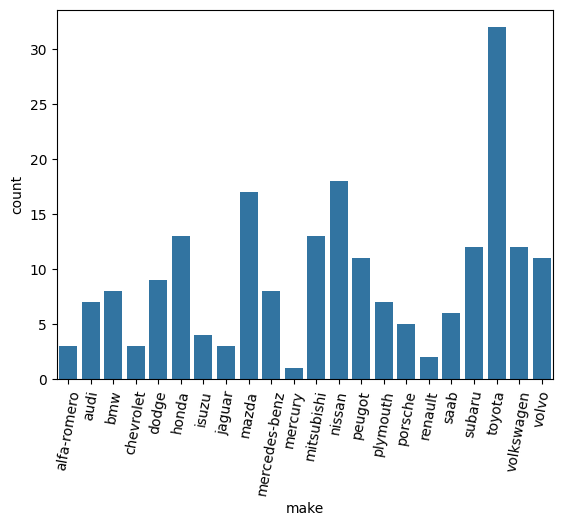

toyota


In [ ]:
df = pd.read_csv('cars.csv')

sns.countplot(data = df, x = df['make'])
plt.xticks(rotation=80)
plt.show()

print('toyota')

 The insurance risk rating which has been allotted to the highest number of vehicles.

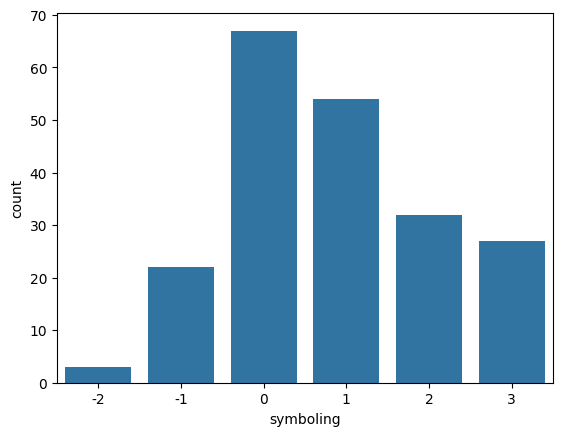

0


In [ ]:
df = pd.read_csv('cars.csv')

df['symboling'].astype('int')

sns.countplot(data = df, x = df['symboling'])
plt.show()

print(0)

The aspiration type contained in most of the vehicles.

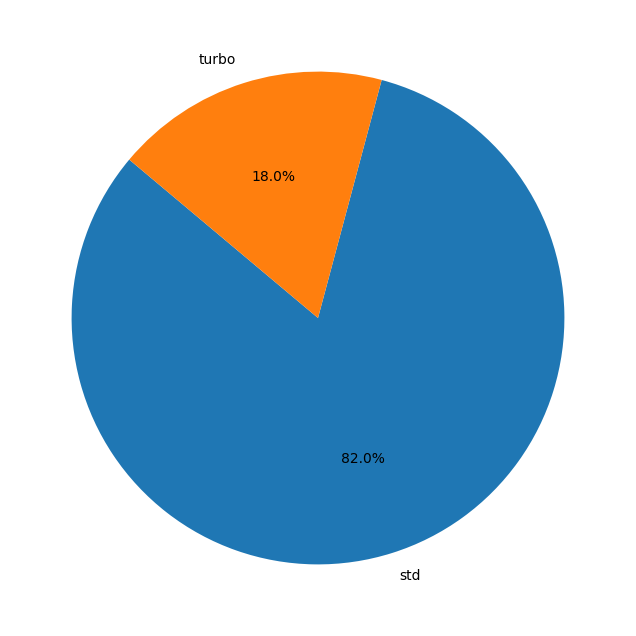

std


In [ ]:
df = pd.read_csv('cars.csv')

counts = df['aspiration'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)

plt.show()

print('std')

 The approximate distribution having the most numbers of cars according to curb weight.

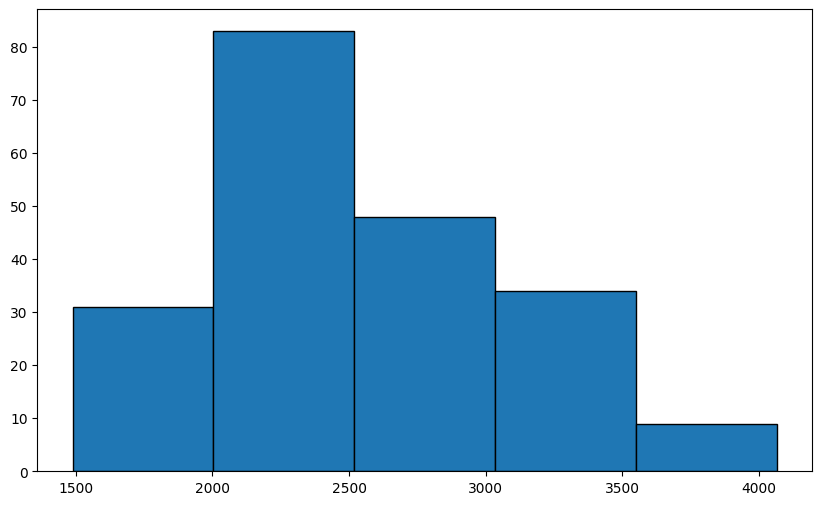

2000-2500


In [ ]:
df = pd.read_csv('cars.csv')

curb_weight_column = 'curb-weight'

plt.figure(figsize=(10, 6))

plt.hist(df[curb_weight_column], bins=5, edgecolor='black')

plt.show()

print('2000-2500')

 The feature most highly correlated with the “Price” feature.

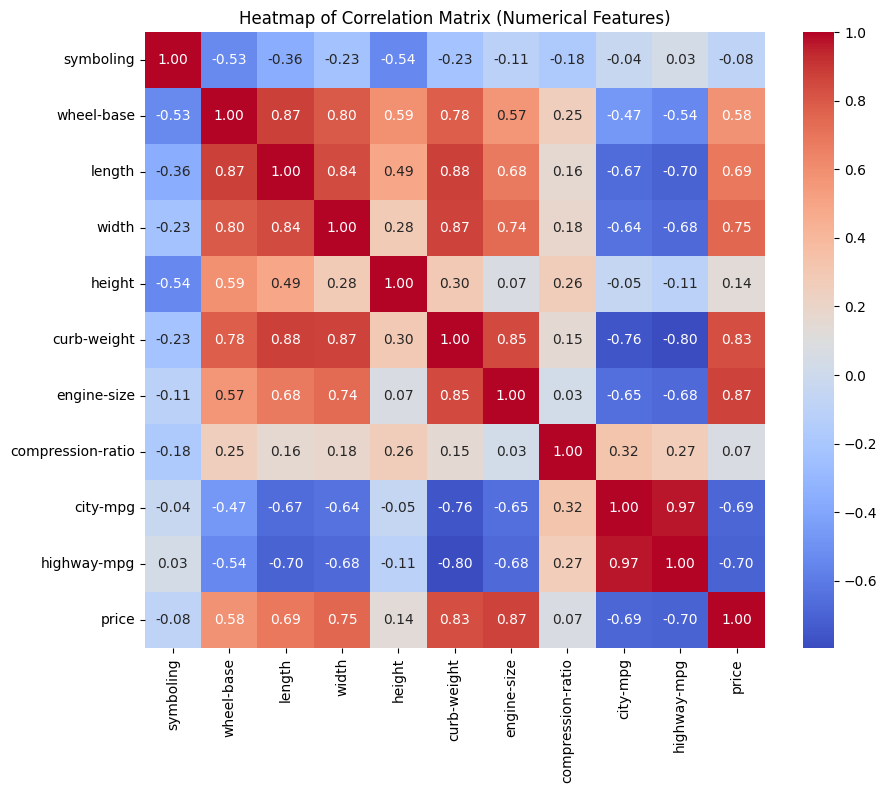

engine-size


In [ ]:
df = pd.read_csv('cars.csv')

if df['price'].dtype == object:
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

numeric_features = df.select_dtypes(include=['int', 'float'])

corr_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix (Numerical Features)')
plt.show()

most_correlated_feature = corr_matrix['price'].sort_values(ascending=False).index[1]

print(most_correlated_feature)

After replacement, the frequency of unique values in the "drive-wheels" column.

In [ ]:
df = pd.read_csv('cars.csv')

df['drive-wheels'] = df['drive-wheels'].replace('4wd', 'fwd')

print(df['drive-wheels'].value_counts())

drive-wheels
fwd    129
rwd     76
Name: count, dtype: int64


the number of duplicated rows in the filtered dataset.

In [ ]:
df = pd.read_csv('cars.csv')

f_df = df[['make', 'city-mpg', 'highway-mpg']]


d_r = f_df.duplicated().sum()

print(d_r)

99


The length of the dataset after deduplication.

In [ ]:
df = pd.read_csv('cars.csv')

df = df[['make', 'city-mpg', 'highway-mpg']]

deduplicated_df = df.drop_duplicates(keep='last')

print(len(deduplicated_df))

106


 the list of column names containing missing values in sorted order of column names.

In [ ]:
df = pd.read_csv('/content/cars (1).csv')

nan_per_column = df.isnull().sum()

column_nan_values = nan_per_column[nan_per_column > 0].index.tolist()

print(sorted(column_nan_values))

['bore', 'horsepower', 'normalized-losses', 'num-of-doors', 'peak-rpm', 'price', 'stroke']


the mean of the dataset after imputation.

In [ ]:
df = pd.read_csv('/content/cars (1).csv')

mean_normalized_losses = df['normalized-losses'].mean()

df['normalized-losses'].fillna(mean_normalized_losses, inplace=True)

mean_after_imputation = df['normalized-losses'].mean()

print(mean_after_imputation)


122.0


 the highway-mpg value after which it is treated as an outlier.

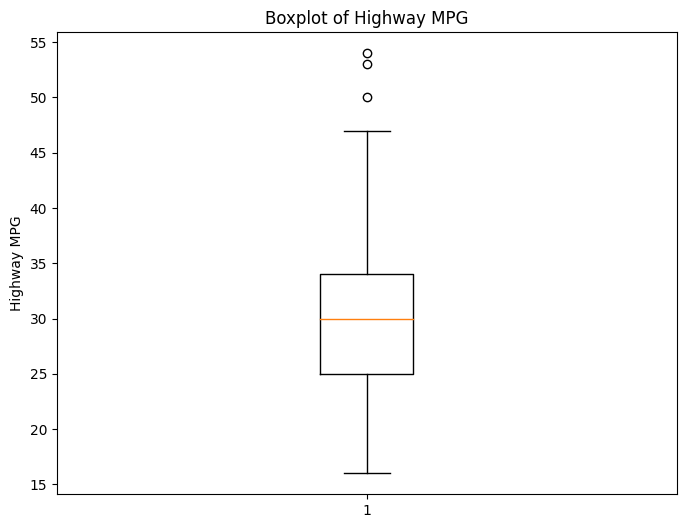

50


In [ ]:
df = pd.read_csv('/content/cars (1).csv')

plt.figure(figsize=(8, 6))
plt.boxplot(df['highway-mpg'])
plt.title('Boxplot of Highway MPG')
plt.ylabel('Highway MPG')
plt.show()

Q1 = df['highway-mpg'].quantile(0.25)
Q3 = df['highway-mpg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



outlier_threshold = np.ceil(upper_bound / 5) * 5

print(int(outlier_threshold))

Number of outliers present in the “highway-mpg”’ feature using a z-score.

In [ ]:
df = pd.read_csv('/content/cars (1).csv')

data = df['highway-mpg']

threshold = 3

mean = np.mean(data)
std = np.std(data)

count = 0

for i in data:
    z = (i-mean)/std
    if np.abs(z) > threshold:
        count = count + 1
print(count)

2


the shape of the dataset after outlier treatment on the “highway-mpg” column.

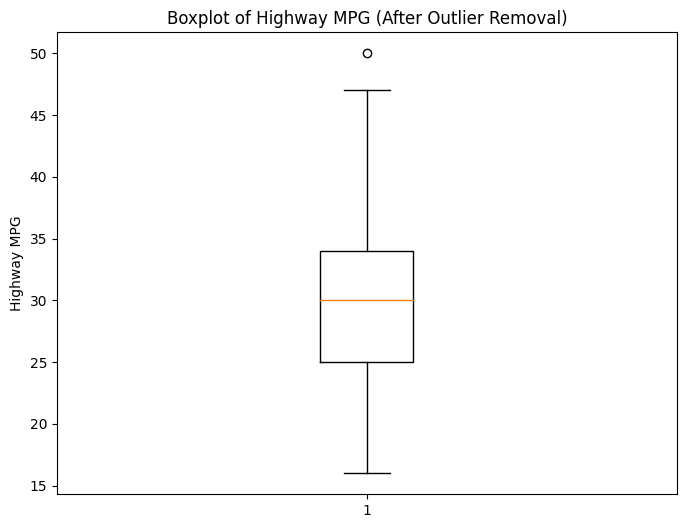

(203, 26)


In [ ]:
df = pd.read_csv('/content/cars (1).csv')

z = np.abs(stats.zscore(df['highway-mpg']))

threshold = 3

outliers = df[np.abs(z) > threshold]

df_cleaned = df[np.abs(z) <= threshold]

plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['highway-mpg'])
plt.title('Boxplot of Highway MPG (After Outlier Removal)')
plt.ylabel('Highway MPG')
plt.show()

print(df_cleaned.shape)

the number of rows having the outliers.

In [ ]:
df = pd.read_csv('/content/cars (1).csv')

z_scores = np.abs(stats.zscore(df['price']))

threshold = 3

outliers = df[np.abs(z_scores) > threshold]

print(outliers.shape[0])

0


the mean of the "engine-size" column after removing the outliers rounded off to two decimal places.

In [ ]:
df = pd.read_csv('/content/cars (1).csv')

z_scores = np.abs(stats.zscore(df['engine-size']))

threshold = 3

outliers = df[np.abs(z_scores) > threshold]

df_cleaned = df[np.abs(z_scores) <= threshold]

engine_size_mean = df_cleaned['engine-size'].mean()

print(round(engine_size_mean, 2))

122.81


the cars whose Maker is 'bmw' and whose engine type is “ohc”.

In [ ]:
df = pd.read_csv('/content/cars (2).csv')

df_b = df[(df['make']=='bmw') & (df['engine-type']=='ohc')]

print(len(df_b))

8


(8, 26)

the top 2 car makers whose price are highest grouped by the car model.

In [ ]:
df = pd.read_csv('/content/cars (2).csv')

gd= df.groupby(["make", "fuel-type"])["price"].sum().reset_index()

sd = gd.sort_values(by="price", ascending=False)
sd=sd.rename(columns={'price':'sum of price'})
top = sd.head(2)


print(top)

      make fuel-type  sum of price
24  toyota       gas      289962.0
2      bmw       gas      208950.0


the pair of features whose correlation is greater than 0.8.

In [ ]:
df = pd.read_csv('/content/cars (2).csv')

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

# Filter highly correlated pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > 0.8:  # Check if correlation is greater than 0.8
            feature_1 = correlation_matrix.columns[i]
            feature_2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append([feature_1, feature_2, round(correlation, 3)])

# Print the results
print()
for pair in highly_correlated_pairs:
    print(pair)


['wheel-base', 'length', 0.871]
['length', 'width', 0.838]
['length', 'curb-weight', 0.874]
['width', 'curb-weight', 0.864]
['curb-weight', 'engine-size', 0.849]
['curb-weight', 'price', 0.835]
['engine-size', 'horsepower', 0.808]
['engine-size', 'price', 0.872]
['horsepower', 'city-mpg', -0.816]
['horsepower', 'price', 0.809]
['city-mpg', 'highway-mpg', 0.968]


Mean of transformed "horsepower" column rounded off to two decimal placesusing normalization technique.

In [ ]:
df = pd.read_csv('/content/cars (2).csv')

scaler = MinMaxScaler()

df['horsepower_scaled'] = scaler.fit_transform(df[['horsepower']])

mean_horsepower_scaled = df['horsepower_scaled'].mean()

mean_horsepower_scaled_rounded = round(mean_horsepower_scaled, 2)

print(mean_horsepower_scaled_rounded)

0.22


The mean of the standardized "normalized-losses" column rounded off to two decimal places.

In [ ]:
df = pd.read_csv('/content/cars (2).csv')

scaler = StandardScaler()

df['normalized-losses_scaled'] = scaler.fit_transform(df[['normalized-losses']])

mean_normalized_losses_scaled = df['normalized-losses_scaled'].mean()

mean_normalized_losses_scaled_rounded = round(mean_normalized_losses_scaled, 2)

print(mean_normalized_losses_scaled_rounded)

0.0


a new feature called "Risk Factor," which converts the numerical values of the symboling feature to categorical types.
the value count of the new feature "Risk Factor".

In [3]:
df = pd.read_csv('/content/cars (2).csv')

risk_values = {3: 'Extremely High',
                        2: 'Very High',
                        1: 'High',
                        0: 'Moderate',
                        -1: 'Safe',
                        -2: 'Moderalty Safe',
                        -3: 'Higly Safe'}

df['Risk Factor'] = df['symboling'].map(risk_values)

print(df['Risk Factor'].value_counts())

Risk Factor
Moderate          67
High              54
Very High         30
Extremely High    27
Safe              22
Moderalty Safe     3
Name: count, dtype: int64


 For a single product, the GST amount is 18% of the Price. A new feature called “Car_Price” is created.

In [5]:
df = pd.read_csv('/content/cars (2).csv')

df['Car_Price'] = df['price'] + 0.18*df['price']

avg = df['Car_Price'].mean()

print(round(avg))

15672


low variance filter on the scaled dataset to select the most relevant features.

In [14]:
cars_data = pd.read_csv("/content/cars (2).csv")

numeric_columns = cars_data.select_dtypes(include=['int', 'float']).columns
numeric_data = cars_data[numeric_columns]
scaled_data = (numeric_data-numeric_data.mean())/numeric_data.std()
variances = scaled_data.var()

threshold = 0.1
mask= variances >= threshold
removed_features = variances[~mask]

if not removed_features.empty:
    print("Features to be removed:")
    for feature in removed_features.index:
        print(feature)
else:
    print("No features need to be removed.")

No features need to be removed.


 high correlation filtering.

In [17]:
cars_data = pd.read_csv("/content/cars (2).csv")

cars_data = cars_data.select_dtypes(include=['number'])

correlation_matrix = cars_data.corr().abs()

threshold = 0.8

high_correlation_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > threshold:
            high_correlation_features.add(correlation_matrix.columns[i])
            high_correlation_features.add(correlation_matrix.columns[j])

if high_correlation_features:
    for x in high_correlation_features:
        print(x)

    cars_data_filtered = cars_data.drop(columns=high_correlation_features)
else:
    print("No features need to be removed.")

wheel-base
length
engine-size
highway-mpg
width
city-mpg
curb-weight
price
horsepower


In [ ]:
Bidirectional feature selection using F-regression.

In [18]:
cars_data = pd.read_csv("/content/cars (3).csv")

numeric_columns = cars_data.select_dtypes(include=['int', 'float']).columns
numeric_data = cars_data[numeric_columns]

target_column = 'MSRP'

X = numeric_data.drop(columns=[target_column])
y = numeric_data[target_column]


def forward_feature_selection(X, y, significance_level=0.05):
    selected_features = []
    remaining_features = list(X.columns)
    while remaining_features:
        p_values = []
        for feature in remaining_features:
            selected = selected_features + [feature]
            X_selected = X[selected]
            p_value = f_regression(X_selected, y) [1][-1]
            p_values. append(p_value)
        best_index = np.argmin(p_values)
        if p_values[best_index] < significance_level:
            selected_features. append(remaining_features. pop(best_index))
        else:
            break
    return selected_features


def backward_feature_selection(X, y, significance_level=0.05):
    remaining_features = list(X.columns)
    while remaining_features:
        X_selected = X[remaining_features]
        p_values = f_regression(X_selected, y) [1]
        worst_index = np.argmax(p_values)
        if p_values[worst_index] > significance_level:
            remaining_features.pop(worst_index)
        else:
            break
    return remaining_features


def bidirectional_feature_selection(X, y, significance_level=0.05):
    forward_selected = forward_feature_selection(X, y, significance_level)
    backward_selected = backward_feature_selection(X, y, significance_level)
    features_to_remove = list(set(X.columns) - set(forward_selected) - set(backward_selected))
    return features_to_remove

features_to_remove = bidirectional_feature_selection(X, y)


if features_to_remove:
    print("Features to be removed:")
    for feature in features_to_remove:
        print(feature)

else:
    print("No features need to be removed.")

Features to be removed:
rowno
